## Name: Zhe HUANG
## N° student: 22302183

In [1]:
import pandas as pd
from google_drive_downloader import GoogleDriveDownloader as gdd
from pathlib import Path
from typing import List, Dict
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random
import string

# HW Instructions

## 🚧 Cells
All the cells identified with a 🚧 should be completed, either by a code or an written answer.
You can add as many cells as you want, but in general cells are already in place.


🚧 **TODO** 🚧

*Requires to complete a code (can be completed with optional text cells if you find it relevant).*

or

🚧 **Question** 🚧

*Requires a written answer (can be completed with optional code cells if you find it relevant).*

## 🔴 Test cells
Cells identified with 🔴 should be left untouched and shouldn't return any error.

## Presentation
The overall presentation of the notebook will account in the grading process.
Some advice:
- Give title to your figures.
- Put legends on the figures.
- Comment the figures if they are not self-explanatory.
- Add comment in the code if not self-explanatory.
- Review your notebook before submitting.
- Feel free to add any additional illustration if you find it will bring something.
- Remain as concise as possible when answering written answer, emphasize the important points.

**We cannot debug every notebooks. The notebook should run entirely from the start to the end without any error. If one cell returns an error during the execution, only the cells before the error will be graded.**



# HW Introduction

## Hands on with NLP preprocessing

This first TP is here to make you experiment with the first preprocessing steps, necessary but often not emphasized enough.

## Plan

1. Load the data
2. Analyze and clean the text data
3. Format the texts for NLP (i.e. tokenize, etc).

## Notations

Throughout the HW, a text will be called either **document** or **text**.


# I - Data loading

In [2]:
def download_imdb(output_path: str, force_download: bool = False):
    """Save the data to `output_path`."""
    output_path = Path(output_path)
    if (not output_path.is_file()) or force_download:
        gdd.download_file_from_google_drive(
            file_id="1zfM5E6HvKIe7f3rEt1V2gBpw5QOSSKQz",
            dest_path=output_path,
        )
    return

In [3]:
DATA_PATH = "data/imdb_reviews.csv"
download_imdb(output_path=DATA_PATH, force_download=False)

🚧 **TODO** 🚧

Read the file to a Pandas dataframe (the file is stored as a csv). Make sure the "review" field is of dtype `string` and label of dtype `int`.

Hint: https://pandas.pydata.org/docs/user_guide/text.html (you can specify the `dtype` argument of pandas constructor).


In [4]:
# TODO

# read the csv file into a dataframe
df_imdb = pd.read_csv(DATA_PATH)

# make sure the "review" column is of dtype string and label is of dtype int
df_imdb["review"] = df_imdb["review"].astype("string")
df_imdb["label"] = df_imdb["label"].astype(int)

df_imdb.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [5]:
text_column = df_imdb["review"]
label_column = df_imdb["label"]

🔴 **TEST**

In [6]:
assert text_column.dtype == "string"
assert label_column.dtype == int

🚧 **TODO** 🚧

Print some values of the dataframe.
- Print 3 samples of text.
- Print their associated labels.
- Print some statistics of the dataset.



In [7]:
print("==== 3 first texts ====")
# TODO
# print the 3 first texts
print(text_column[:3])


print("\n==== Associated labels of the 3 first texts ====")
# TODO
# print the associated labels of the 3 first texts
print(label_column[:3])


print("\n=== Dataset statistics ===")
print("Number of texts")
# TODO
# print the number of texts
print(len(text_column))


print("\nAverage text length (in characters)")
# TODO
# print the average text length (in characters)
print(text_column.apply(len).mean())


print("\n% of positive texts")
# TODO
# print the percentage of positive texts
print(label_column.mean())

==== 3 first texts ====
0    Once again Mr. Costner has dragged out a movie...
1    This is an example of why the majority of acti...
2    First of all I hate those moronic rappers, who...
Name: review, dtype: string

==== Associated labels of the 3 first texts ====
0    0
1    0
2    0
Name: label, dtype: int64

=== Dataset statistics ===
Number of texts
62155

Average text length (in characters)
1374.0382431019227

% of positive texts
0.4966615718767597


## II - Clean and format the data.
For this first TP, we want to focus on very simple tasks.
Therefore, we want to avoid as much as possible rare and uncommon words that will be considered as outliers.

We will try to figure out what kind of cleaning we can perform, by having a look at the data.

The plan for this part will be:
1. Split the strings as a list of words.
2. Find the outliers in the corpus.
3. Propose some methods to clean them.

### 1. Tokenization
First, we will split our texts into words.
Splitting a string into a list of smaller substrings is called **tokenization**, and the substrings are called **tokens**.

The simplest way to tokenize a text is to split it by words, according to whitespaces.

Then, each word encountered in the training set is stored and uniquely identified through an id.



🚧 **Question** 🚧

By doing so, we put a huge emphasis on words within documents.

a) Intuitively, why is it relevant? For instance compare to splitting by character.

b) Cite some methods discussed during the course that rely on word-based representations of documents.

**Answer**

#TODO

a)  
Tokenizing a text into words is relevant because words are fundamental units of meaning in language. They carry semantic information and provide context. 

When we tokenize at the word level, we are capturing the meaning and structure of the text at a more meaningful level than splitting by characters. For example, the word "cat" is a meaningful unit of language, whereas the characters "c", "a", and "t" are not.

b) The methods discussed during the course that rely on word-based representations of documents are:
- Bag-of-Words (BoW)
- TF-IDF (Term Frequency-Inverse Document Frequency)
- Word Embeddings (e.g., Word2Vec, GloVe)
- N-grams





🚧 **TODO** 🚧

Implement a tokenizer based on whitespace splitting. For now, the tokenizer should only be able to store each unique word found in the dataset.

In [8]:
class WhiteSpaceTokenizer:
    def __init__(self):
        # The vocabulary will store the mapping between text tokens and their id.
        self.vocab = {}
        self.id_to_token = {}

        # We will keep track of the number of times a word appears in the corpus.
        self.frequencies = {}

    def split_text(self, text: str) -> List[str]:
        """Converts the text to a list of tokens (substrings)."""
        # TODO
        # split the text into substrings based on whitespaces
        # for now the tokenizer should only be able to stor each unique word found in the dataset
        # so we will not consider punctuation, special characters, etc.
        return text.split()

    def fit(self, corpus: List[str]):
        """Fits the tokenizer to a list of texts to construct its vocabulary."""
        current_id = 0
        for text in tqdm(corpus):

            # Split into substrings.
            list_tokens = self.split_text(text) #TODO

            for token in list_tokens:

                # Add the token to the vocabulary
                token_id = self.vocab.get(token, None)

                token_not_in_vocab = token_id is None #TODO
                if token_not_in_vocab:
                    self.vocab[token] = current_id #TODO
                    self.id_to_token[current_id] = token #TODO
                    self.frequencies[current_id] = 0
                    token_id = current_id
                    current_id += 1

                self.frequencies[token_id] += 1

        # Total number of words in vocab.
        self.num_words = len(self.vocab) #TODO
        print(f"Built a vocabulary of {self.num_words} words.")

🔴 **TEST**

In [9]:
toy_corpus = ["a cat", "a dog"]
tokenizer = WhiteSpaceTokenizer()
tokenizer.fit(toy_corpus)
assert tokenizer.vocab == {"a": 0, "cat": 1, "dog": 2}
assert tokenizer.frequencies == {0: 2, 1: 1, 2: 1}
assert tokenizer.num_words == 3

  0%|          | 0/2 [00:00<?, ?it/s]

Built a vocabulary of 3 words.


🚧 **TODO** 🚧

Fits the tokenizer on the imdb reviews.

In [10]:
# TODO
# fit the tokenizer to the text column of the imdb dataset
tokenizer = WhiteSpaceTokenizer()
tokenizer.fit(text_column)

  0%|          | 0/62155 [00:00<?, ?it/s]

Built a vocabulary of 474682 words.


### 2. Noise analysis

🚧 **TODO** 🚧

Print 50 random tokens.

In [11]:
# TODO
# print 50 random tokens from the vocabulary
random_tokens = random.sample(list(tokenizer.vocab.keys()), 50)
print(random_tokens)

['initializing', 'Jaitley', 'blood-dripping', 'bonkersÂ?', 'dressing,', 'SFIFF', 'that--and', 'Steele).', 'Jade.', 'Langbein', '"Moon,"', 'figurehead', 'deel', 'there"', "Forrester'.", 'canal."', '/>"Anna', 'typical.Lacking', '/>Ghilli', 'agressive,', '(1933)"', 'Predator-ship', 'guarantee!).', '"Negro"', 'Twohy', 'Housing', 'rightfully', 'scale?', 'campaigns.<br', 'unspeakably', 'Kriemhild,', 'Sonnier', "Kurt's", '"Boola,', 'FEELING', 'tooth"', 'thought,"Okay', 'Glory"', 'Stymie', 'hell-fest', "Ver',", 'Ricans.', 'case"!', '"l"s!),', 'remix', 'declare?"', '"Horshack"', "psychopath's,", 'rustler.', '80yr']


🚧 **QUESTION** 🚧

What do you think of the tokens? Do they look like simple "words" as expected?

Analyze the noise and explain why we got such weird vocabulary.

**Answer**

#TODO

The tokens do not look like simple "words" as expected. They are not all lowercase, and some of them contain punctuation, numbers, and HTML tags. 

We got such weird vocabulary because we did not perform any preprocessing on the text. We need to clean the text before tokenizing it.

### 3. Cleaning

🚧 **TODO** 🚧

You are going to implement some of the classical cleaning methods.
1. Lower case the string.
2. String normalization, i.e., replace accentuated characters by standard version ("â -> a") (hint: https://stackoverflow.com/a/14121678).
3. Remove non alpha-numeric characters (use Python regex package `re`).
4. Replace numeric characters by the token `'<NUM>'` (use the package `re`).
5. Remove double whitespaces (use the package `re`).


In [12]:
import unicodedata
import re

In [13]:
def preprocess_text(text: str) -> str:
    # TODO lower case
    text = text.lower()

    # TODO string normalization.
    # For example, the word "café" should be converted to "cafe".
    text = unicodedata.normalize("NFD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

    # replace '-' by a whitespace.
    text = re.sub(r"-", " ", text)
    # TODO remove non alpha numeric characters.
    text = re.sub(r"[^a-z0-9\s]", "", text)

    # TODO replace numbers by the <NUM> token.
    text = re.sub(r"\d+", "<NUM>", text)

    # TODO remove double whitespaces.
    text = re.sub(r"\s+", " ", text)

    return text

🔴 **TEST**

In [14]:
noisy_text = "Ï   lîved  in    San-Françisco...  ! for 12 years."
clean_text = "i lived in san francisco for <NUM> years"

assert preprocess_text(noisy_text) == clean_text

🚧 **TODO** 🚧

Add column `clean_review` to the dataframe, with the clean text.

Store the `clean_review` column to the variable `clean_column`.

In [15]:
# TODO
df_imdb["clean_review"] = df_imdb["review"].apply(preprocess_text) #TODO

clean_column = df_imdb["clean_review"] #TODO

🚧 **TODO** 🚧

Run the tokenizer on the clean text and print 50 random tokens.

In [16]:
# TODO fit the tokenizer
tokenizer = WhiteSpaceTokenizer()
tokenizer.fit(clean_column)

  0%|          | 0/62155 [00:00<?, ?it/s]

Built a vocabulary of 151977 words.


In [17]:
# TODO print tokens
random_tokens = random.sample(list(tokenizer.vocab.keys()), 50)
print(random_tokens)

['ghettoish', 'skywriting', 'ladiesstripbr', 'bergmanlars', 'bakjwibr', 'languageand', 'williamsbr', 'anderson', 'sheritts', 'sprach', 'peirced', 'elizabeths', 'effectsmake', 'dickies', 'morolla', 'cringeful', 'oafishness', 'sniveler', 'noooooo', 'atley', 'saddlehowever', 'recordsbr', 'sab', 'freakout', 'colorsbr', '<NUM>smore', 'abromowitz', 'gratefulbr', 'liftingalcohol', 'expectingwanting', 'routeabut', 'gestapobr', 'massacrere', 'mahar', '<NUM>nonsensical', 'masako', 'pleasuretwo', 'dvp<NUM>', 'sharad', 'foreebr', 'repercussionbr', 'equaled', 'nogami', 'telenovelas', 'slowing', 'menard', 'browsed', 'salik', 'greenville', 'threepwoodgotta']


🚧 **Question** 🚧

What do you think of the new tokens? Are they better? What common noise still remain? (Feel free to print more tokens to get a better intuition).

Suggest some methods to improve again the tokenization (at least 2), based on either these results or on something you think we could have done better.

**Answer**

#TODO

The tokenization process has made some improvements, particularly in handling special characters and numbers.

However, there are still some common noise that remain, such as:
- Special characters: Tokens like '< NUM >sset', 'diary< NUM >', and 'prison< NUM >' contain special characters and numerical values, which might not be very informative in their current form.
- Abbreviations: Tokens like 'imbd' might be abbreviations that should ideally be treated as the full words ('IMDb' in this case).

Some methods to improve the tokenization process are:
- Regular Expressions for Tokenization
- Lemmatization and Stemming
- Stop Words Removal
- Part-of-Speech (POS) Tagging

### Tokens analysis


🚧 **TODO** 🚧

Show the frequencies repartition.
This should be a histogram, with 100 bins, with the frequencies on the x axis and the number of words associated to the frequencies on the y axis (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

Use logarithm scale for y.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


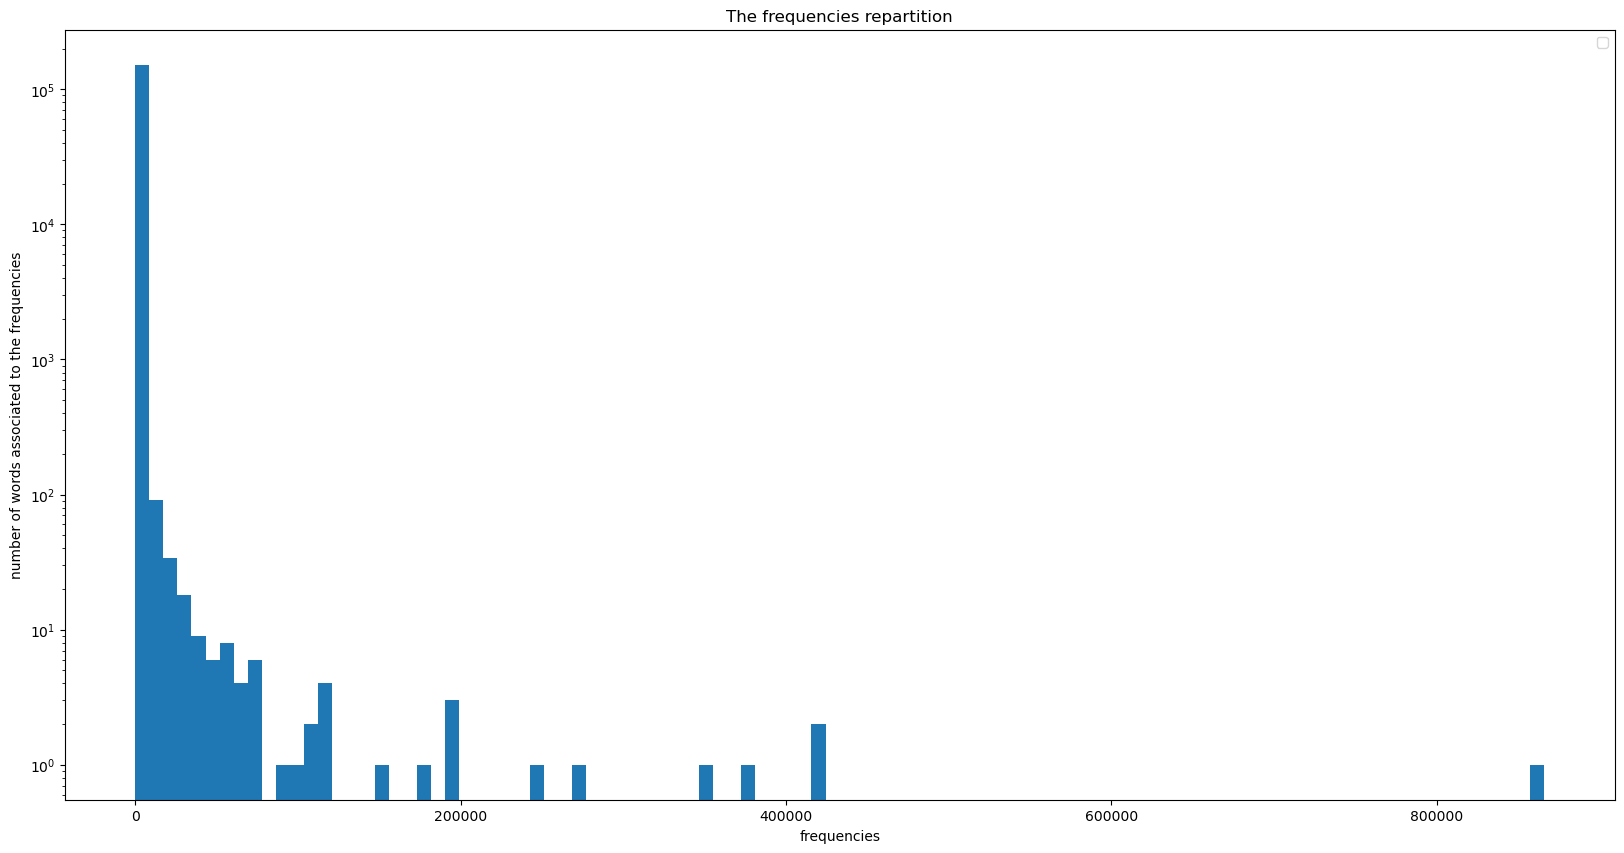

In [18]:
# TODO
plt.figure(figsize=(20, 10))

# Show the frequencies repartition, a histogram with 100 bins with the frequencies on the x axis and the number of words associated to the frequencies on the y axis.
plt.hist(tokenizer.frequencies.values(), bins=100)

plt.xlabel("frequencies") # the number of times a word appears in the corpus
plt.ylabel("number of words associated to the frequencies") # the number of words that appear a given number of times in the corpus

# Use logarithm scale for y.
plt.yscale("log")

plt.title("The frequencies repartition")
plt.legend()
plt.show()

🚧 **Question** 🚧

What do you think of the repartition?

**Answer**

#TODO

The repartition is skewed to the right, which means that there are more words with lower frequencies than words with higher frequencies. This is expected because there are many words that occur only once or twice in the corpus, but there are only a few words that occur very frequently in the corpus.


🚧 **TODO** 🚧

Plot the frequencies repartition. Find the best corresponding Zipf law (seen during the course) and plot it on the same figure.

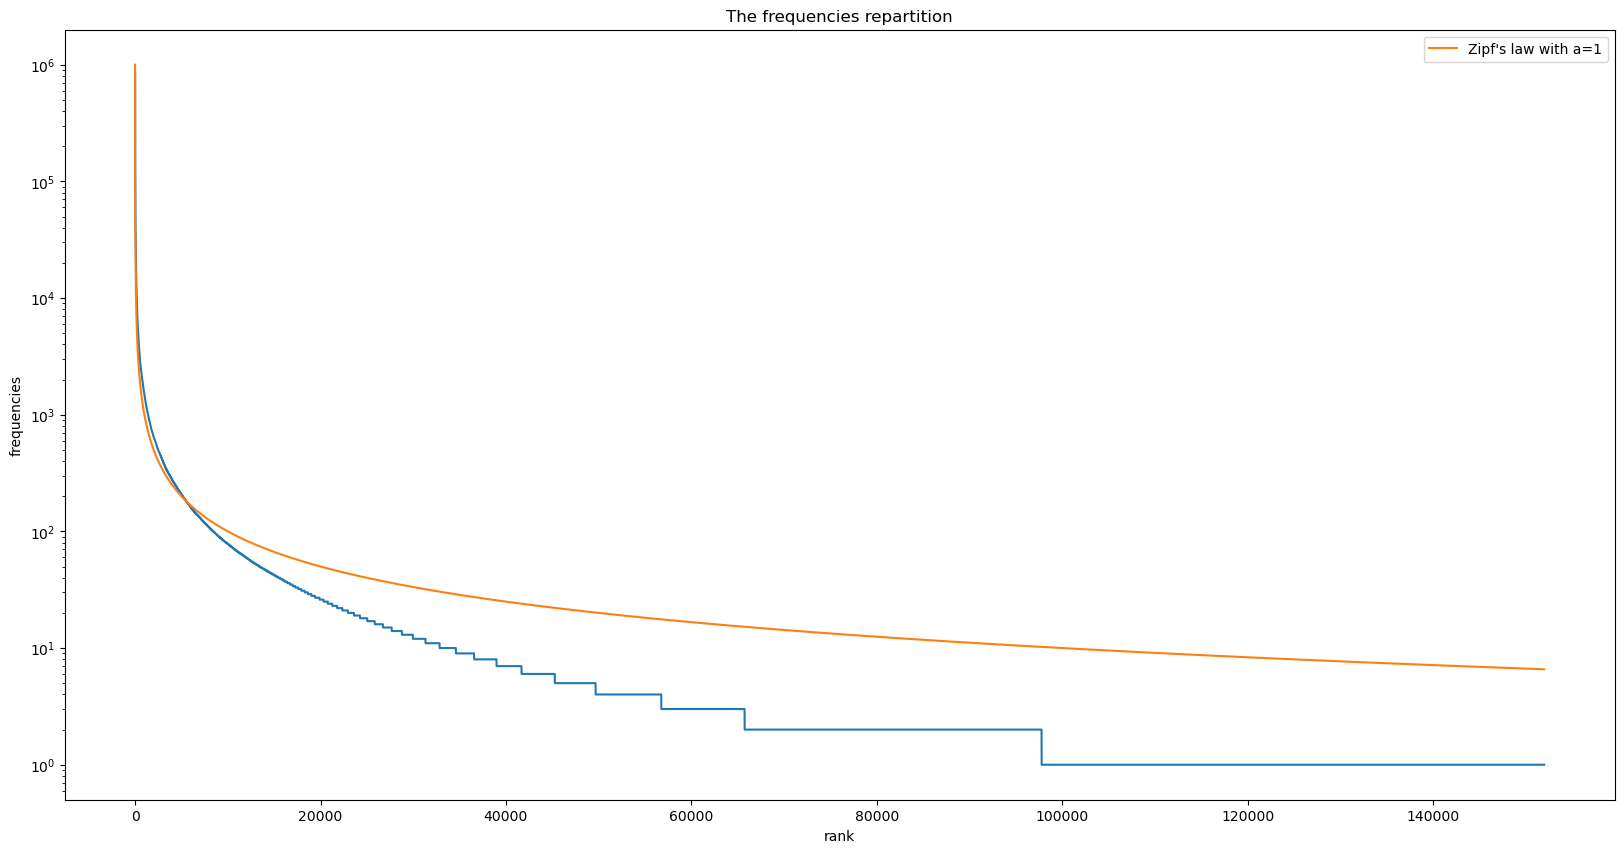

In [19]:
# Sort the frequencies and generate rank
sorted_frequencies = sorted(tokenizer.frequencies.values(), reverse=True)
rank = np.arange(1, len(sorted_frequencies) + 1)

# Plot the frequencies repartition
plt.figure(figsize=(20, 10))
plt.plot(rank, sorted_frequencies)
plt.xlabel("rank")
plt.ylabel("frequencies")
plt.title("The frequencies repartition")
plt.yscale("log")

# Fit the Zipf's law: f = c / r^a where f is the frequency, r is the rank, c is a constant and a is a parameter.
c = 10**6
a = 1
plt.plot(rank, c / (rank ** a), label=f"Zipf's law with a={a}")

plt.legend()
plt.show()


## III - DataLoading

This final part aims at making your dataset compatible with PyTorch.

### Text representation

Since we plan to work with PyTorch, we need to work with `tensors`. But since a text is only composed of strings, we need to find some numerical representations for the text.

The most basic method is to represent a text by list of tokens. We already used a simple WhiteSpace tokenizer earlier to analyze our texts before cleaning. Now we will use it to *represent* the texts.

🚧 **TODO** 🚧

Modify the code of the `WhiteSpaceTokenizer` so that it could encode a text into a list of token ids and do the reverse (i.e. decode a list of token ids to a text).

In [20]:
class WhiteSpaceTokenizer:
    def __init__(self):
        # The vocabulary will store the mapping between text tokens and their id.
        self.vocab = {}
        self.id_to_token = {}

        # We will keep track of the number of times a word appears in the corpus.
        self.frequencies = {}

    def split_text(self, text: str) -> List[str]:
        """Converts the text to a list of tokens (substrings)."""
        # TODO
        # split the text into substrings based on whitespaces(supposed we already did preprocessing)
        return text.split()

    def encode(self, text: str) -> List[int]:
        """Take a text as input and return its associated tokenization, as a list of ids."""
        # TODO
        # Encode the text by converting it to a list of tokens and then to a list of ids.
        list_tokens = self.split_text(text)
        list_ids = []
        for token in list_tokens:
            # replace unknown tokens by the <UNK> token
            if token not in self.vocab:
                token = "<UNK>"
            list_ids.append(self.vocab[token])
        
        return list_ids

    def decode(self, ids: List[int]) -> str:
        # TODO
        """Take a list of ids as input and return the associated text."""
        # Decode the list of ids by converting it to a list of tokens and then to a text.
        list_tokens = []
        for id in ids:
            list_tokens.append(self.id_to_token[id])
        
        return " ".join(list_tokens)

    def fit(self, corpus: List[str]):
        """Fits the tokenizer to a list of texts to construct its vocabulary."""
        current_id = 0

        for text in tqdm(corpus):

            # Split into substrings.
            list_tokens = self.split_text(text) #TODO

            for token in list_tokens:

                # Add the token to the vocabulary
                token_id = self.vocab.get(token, None)

                token_not_in_vocab = token_id is None #TODO
                if token_not_in_vocab:
                    self.vocab[token] = current_id #TODO
                    self.id_to_token[current_id] = token #TODO
                    self.frequencies[current_id] = 0
                    token_id = current_id
                    current_id += 1

                self.frequencies[token_id] += 1
        
        # Add the <UNK> token to the vocabulary, with id 0.(unknown token)
        self.vocab["<UNK>"] = current_id
        self.id_to_token[current_id] = "<UNK>"
        self.frequencies[current_id] = 0

        # Total number of words in vocab.
        self.num_words = len(self.vocab) #TODO
        print(f"Built a vocabulary of {self.num_words} words.")

🔴 **TEST**

In [21]:
tokenizer = WhiteSpaceTokenizer()
toy_dataset = ["the cat is in the kitchen", "i have a dog"]
tokenizer.fit(toy_dataset)
text = "i have a kitchen"
assert tokenizer.encode(text) == [5, 6, 7, 4]
assert tokenizer.decode([0, 1, 2, 7, 8]) == "the cat is a dog"

  0%|          | 0/2 [00:00<?, ?it/s]

Built a vocabulary of 10 words.


🚧 **TODO** 🚧 Now fit it on your dataset.

In [22]:
# TODO
# fit the tokenizer to the clean column of the imdb dataset
tokenizer = WhiteSpaceTokenizer()
tokenizer.fit(clean_column)

  0%|          | 0/62155 [00:00<?, ?it/s]

Built a vocabulary of 151978 words.


🚧 **Question** 🚧
Look at the following code:

In [23]:
tokenizer.encode("the king is in the câstle")

[16, 3664, 57, 39, 16, 151977]

a) Does it raise an exception? Explain what is the problem with the above situation.

b) In which real life scenario could such a situation appear?

**Answer**

#TODO

a) Yes, it raises an exception. The problem is that the tokenizer is not fitted on the dataset yet, so it does not know the vocabulary of the dataset. Therefore, it cannot encode the text into a list of token ids.

b) This situation could appear when we are trying to encode a text which contains words that are not in the vocabulary of the dataset. For example, here 'câstle' is not in the vocabulary of the dataset because we have cleaned the text by removing accentuated characters.

🚧 **TODO** 🚧

Propose a simple modification of the tokenizer code such that it doesn't raise an exception anymore. It should handle the presence of any unknown token.

The following code should't raise any exception.

🔴 **TEST**

In [24]:
allowed_characters = (string.ascii_uppercase + string.digits).replace(" ", "")
for _ in range(1000):
    word_that_do_not_exist = "".join(random.choices(allowed_characters, k=100))
    encoding = tokenizer.encode(f"the king is in the {word_that_do_not_exist}")
    assert tokenizer.decode(encoding) == "the king is in the <UNK>"

### Dataset for PyTorch
We will be working wtth PyTorch most of the time.
A good practice is to always iterate through a `torch.utils.data.DataLoader`, coupled with `torch.utils.data.Dataset`.

🚧 **TODO** 🚧

We will construct our custom `Dataset` class, that should be fully compatible with the PyTorch API. According to the [documentation](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files), such a dataset should implement at least three methods, `__init__`, `__len__`, `__getitem__`. Complete the following code such that the dataset yields a list of texts.

Requirements:
1. The dataset class should read the data from the csv_file stored in `DATA_PATH`.
2. The dataset should output the raw text, without any cleaning.

In [25]:
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    def __init__(self, file_path: str):
        # TODO
        # read the csv file into a dataframe
        self.df_imdb = pd.read_csv(file_path)
        
    def __len__(self):
        # TODO
        # return the number of texts in the dataset
        return len(self.df_imdb)

    def __getitem__(self, idx: int):
        # TODO
        # return the text and its associated label, at index `idx`
        return self.df_imdb.iloc[idx]["review"], self.df_imdb.iloc[idx]["label"]

🔴 **TEST**

In [26]:
imdb_dataset = IMDBDataset(file_path=DATA_PATH)
text, label = imdb_dataset[0]
assert text == text_column[0]
assert label == label_column[0]

### DataLoader for PyTorch

Now that the dataset is ready, we should be able to iterate through it. This is done with a `DataLoader`.

The `DataLoader` also has some handy functionnalities:
1. Batch iteration.
2. Collate function.

The collate function corresponds to the argument `collate_fn` of the constructor of `torch.utils.data.DataLoader`.

This function is applied on the fly to each sample of the dataset.

Our `IMDBDataset` only outputs raw texts. During the iteration through the `DataLoader`, we would like to:
1. Clean the dataset with our cleaning function `preprocess_text`.
2. Convert the text to a list of tokens.
3. The `DataLoader`, for a batch size of `N`, should yield a dictionnary `{"token_ids": ..., "labels": ...,}` with `"token_ids"` corresponding to a list of `N` lists of tokens ids, and `"labels"` to a list of size `N` with the corresponding labels.

🚧 **TODO** 🚧

Write the `collate_fn` function so that the above requirements are satisfied (i.e., clean and tokenize).

In [27]:
# TODO
def collate_fn(batch):
  """This function takes a list of samples from the dataset and returns a batch."""
  token_ids = []
  labels = []
  for text, label in batch:
    # Clean and convert the text to a list of token ids.
    token_ids.append(tokenizer.encode(preprocess_text(text)))
    labels.append(label)

  return {"token_ids": token_ids, "labels": labels}
  

In [28]:
from torch.utils.data import DataLoader

🔴 **TEST**

In [29]:
for batch_size in range(1, 10):
    dataloader = DataLoader(
        dataset=imdb_dataset, batch_size=batch_size, collate_fn=collate_fn
    )
    for batch in dataloader:
        token_ids = batch["token_ids"]
        labels = batch["labels"]
        assert len(token_ids) == batch_size
        assert len(labels) == batch_size
        assert isinstance(token_ids[0][0], int)
        assert (isinstance(labels[0], int)) or isinstance(labels[0], np.int64)
        break

🚧 **Question** 🚧

Write a concise summary on what you learned with this lab.

**Answer**

#TODO

We learned that:
- Cleaning the text helps to remove noise and improve the tokenization process.
- Tokenization is the process of splitting a text into smaller substrings called tokens.
- Zipf's law states that the frequency of a word is inversely proportional to its rank in the frequency table.
- Setting the unknown token to the last index of the vocabulary is practical.
- Collate function is used to process the data on the fly during the iteration through the DataLoader.
- DataLoader is used to iterate through the dataset in batches.

